# INTRODUCTION

JFCNJJCS

### Data Preparation

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from collections import Counter

In [3]:
txtdata="aluminium - dangerous if greater than 2.8 ammonia - dangerous if greater than 32.5 arsenic - dangerous if greater than 0.01 barium - dangerous if greater than 2 cadmium - dangerous if greater than 0.005chloramine - dangerous if greater than 4 chromium - dangerous if greater than 0.1 copper - dangerous if greater than 1.3 flouride - dangerous if greater than 1.5 bacteria - dangerous if greater than 0 viruses - dangerous if greater than 0 lead - dangerous if greater than 0.015 nitrates - dangerous if greater than 10 nitrites - dangerous if greater than 1 mercury - dangerous if greater than 0.002 perchlorate - dangerous if greater than 56 radium - dangerous if greater than 5 selenium - dangerous if greater than 0.5 silver - dangerous if greater than 0.1 uranium - dangerous if greater than 0.3 is_safe - class attribute {0 - not safe, 1 - safe} "

In [4]:
#print(txtdata)
#res = [float(i) for i in txtdata.split() if isinstance(i, float)]
import re
result = re.findall(r"[-+]?\d*\.\d+|\d+", txtdata)
print (result)

#print(str(res))

['2.8', '32.5', '0.01', '2', '0.005', '4', '0.1', '1.3', '1.5', '0', '0', '0.015', '10', '1', '0.002', '56', '5', '0.5', '0.1', '0.3', '0', '1']


In [5]:
Data=pd.read_csv('waterQuality1.csv')
Data

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

Notice that ammonia has inconsistent data. We need to correct the data and replace `#NUM!`

In [7]:
AmmoniaData=[]
for i in range(len(Data)):
    k=Data.loc[i,'ammonia']
    if k=='#NUM!':
        AmmoniaData+=[0]
    else:
        AmmoniaData+=[float(k)]
Data['ammonia']=AmmoniaData

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   float64
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [8]:
OriginalDataForLDA=Data.copy()
OriginalData=Data.copy()

In [9]:
indexNames = OriginalDataForLDA[OriginalDataForLDA['is_safe'] == "#NUM!" ].index
#Delete these row indexes from dataFrame
OriginalDataForLDA.drop(indexNames , inplace=True)

In [10]:
OriginalDataForLDA.is_safe.value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

From here, we observe that the number of unsafe water compared to safe water is too big of a difference. We have to resample the data to get a more equal value

In [11]:
# separate safe and not safe data
data_0 = OriginalDataForLDA[OriginalDataForLDA['is_safe'] == '0']
data_1 = OriginalDataForLDA[OriginalDataForLDA['is_safe'] == '1']

In [12]:
data_0 = data_0.sample(n=7084)

In [13]:
#put the issafe column together again
data_isSafe = data_1.append(data_0)
data_isSafe.is_safe.value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

In [14]:
u = data_isSafe.iloc[:, :-1]
v = data_isSafe.iloc[:, -1]

### Resampling

In [15]:
# import library
import imblearn
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target varialbe
u_rus, v_rus = rus.fit_resample(u, v)

print('original dataset shape:', Counter(v))
print('Resample dataset shape', Counter(v_rus))

original dataset shape: Counter({'0': 7084, '1': 912})
Resample dataset shape Counter({'0': 912, '1': 912})


In [16]:
resampled=v_rus
resampled_variable=u_rus

In [17]:
resampled = resampled.to_frame(name="is_safe")

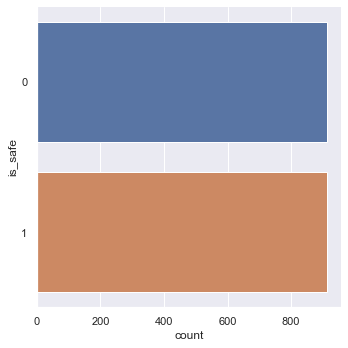

In [18]:
sb.catplot(y = 'is_safe', data = resampled, kind = "count")

The number of safe data and not safe data are now equal

In [19]:
# combine the data together again
OriginalDataForLDA=resampled_variable
OriginalDataForLDA["is_safe"]=resampled
OriginalDataForLDA

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,0.07,15.98,0.06,3.00,0.07,0.49,0.06,0.58,1.07,0.52,...,0.103,15.72,1.89,0.005,2.53,4.76,0.01,0.03,0.00,0
1,0.80,9.64,0.82,0.96,0.12,4.65,0.66,0.01,0.56,0.00,...,0.001,16.19,1.45,0.003,59.72,3.36,0.05,0.04,0.08,0
2,0.07,9.99,0.08,0.98,0.07,0.23,0.08,0.98,0.79,0.00,...,0.115,1.75,0.03,0.002,0.18,1.56,0.05,0.06,0.07,0
3,0.02,27.65,0.10,0.49,0.07,0.39,0.06,0.74,0.84,0.22,...,0.043,2.32,1.55,0.007,10.95,6.86,0.09,0.09,0.09,0
4,0.03,22.38,0.02,2.03,0.08,0.08,0.04,1.58,0.57,0.60,...,0.146,0.14,1.58,0.010,5.32,2.40,0.07,0.05,0.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,0.05,7.78,0.00,1.95,0.04,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
1820,0.05,24.22,0.02,0.59,0.01,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
1821,0.09,6.85,0.00,0.61,0.03,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
1822,0.01,10.00,0.01,2.00,0.00,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [20]:
DescribeFrame=Data.describe()
DescribeFrame

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,14.272857,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,8.881569,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.560000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,22.130000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


We encode the data accordingly to save levels of each components

In [21]:
ColList=list(Data.columns)
print(ColList)
MaxCount=DescribeFrame.iloc[7]
Max_list =MaxCount.tolist()
print(Max_list)
print (result)

['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium', 'is_safe']
[5.05, 29.84, 1.05, 4.94, 0.13, 8.68, 0.9, 2.0, 1.5, 1.0, 1.0, 0.2, 19.83, 2.93, 0.01, 60.01, 7.99, 0.1, 0.5, 0.09]
['2.8', '32.5', '0.01', '2', '0.005', '4', '0.1', '1.3', '1.5', '0', '0', '0.015', '10', '1', '0.002', '56', '5', '0.5', '0.1', '0.3', '0', '1']


In [22]:
for j in range (19):
    if float(Max_list[j])<=float(result[j]):
        OriginalDataForLDA[str(ColList[j]+'_bin')]= pd.cut(Data.iloc[:,j],
                           [-0.001, float(result[j]), 100.00],
                           labels=['Safe', 'Dangerous'])
    else:
        OriginalDataForLDA[str(ColList[j]+'_bin')]= pd.cut(Data.iloc[:,j],
                           [-0.001, float(result[j]), float(Max_list[j])],
                           labels=['Safe', 'Dangerous'])

In [23]:
OriginalDataForLDA

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,bacteria_bin,viruses_bin,lead_bin,nitrates_bin,nitrites_bin,mercury_bin,perchlorate_bin,radium_bin,selenium_bin,silver_bin
0,0.07,15.98,0.06,3.00,0.07,0.49,0.06,0.58,1.07,0.52,...,Dangerous,Safe,Dangerous,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Safe,Dangerous
1,0.80,9.64,0.82,0.96,0.12,4.65,0.66,0.01,0.56,0.00,...,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Dangerous,Safe,Safe,Safe,Dangerous
2,0.07,9.99,0.08,0.98,0.07,0.23,0.08,0.98,0.79,0.00,...,Dangerous,Dangerous,Dangerous,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Safe,Dangerous
3,0.02,27.65,0.10,0.49,0.07,0.39,0.06,0.74,0.84,0.22,...,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Dangerous,Safe,Safe,Safe,Dangerous
4,0.03,22.38,0.02,2.03,0.08,0.08,0.04,1.58,0.57,0.60,...,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Dangerous,Safe,Safe,Safe,Safe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,0.05,7.78,0.00,1.95,0.04,0.10,0.03,0.03,1.37,0.00,...,Dangerous,Dangerous,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Dangerous,Safe,Dangerous
1820,0.05,24.22,0.02,0.59,0.01,0.45,0.02,0.02,1.48,0.00,...,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Dangerous,Safe,Safe,Safe,Dangerous
1821,0.09,6.85,0.00,0.61,0.03,0.05,0.05,0.02,0.91,0.00,...,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Dangerous,Safe,Safe,Safe,Dangerous
1822,0.01,10.00,0.01,2.00,0.00,2.00,0.00,0.09,0.00,0.00,...,Dangerous,Dangerous,Dangerous,Dangerous,Dangerous,Safe,Safe,Safe,Safe,Dangerous


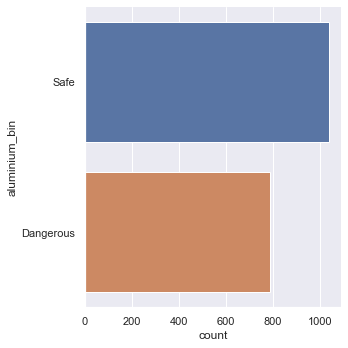

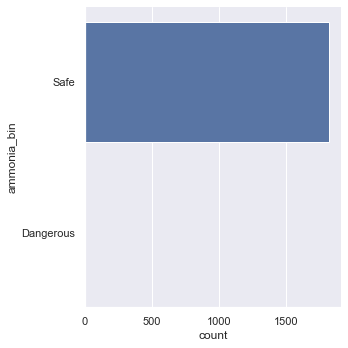

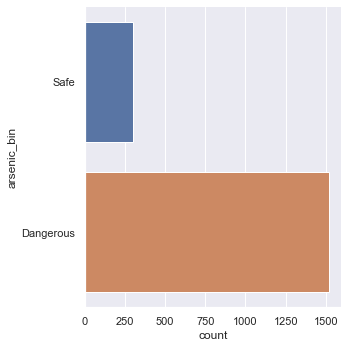

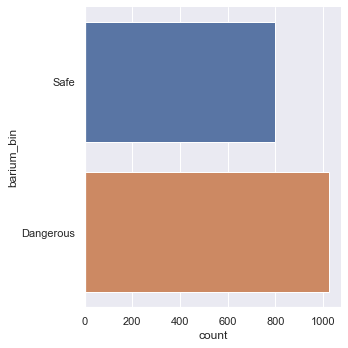

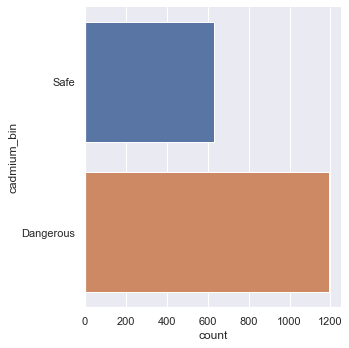

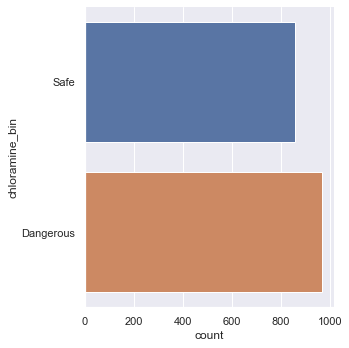

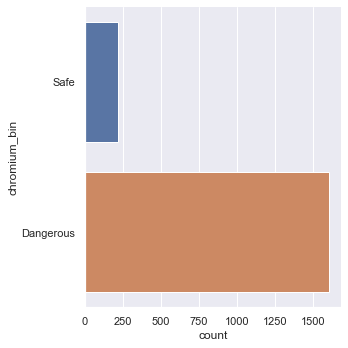

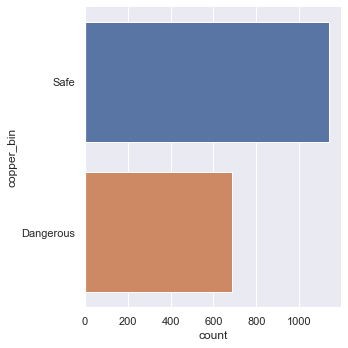

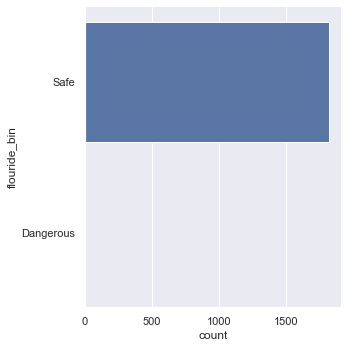

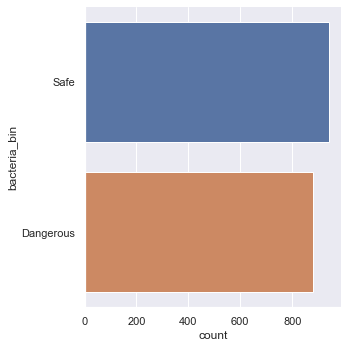

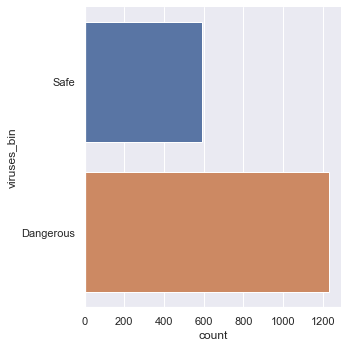

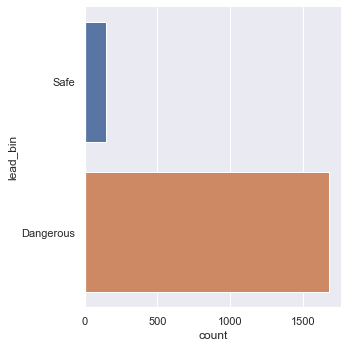

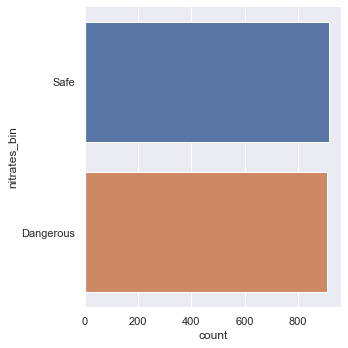

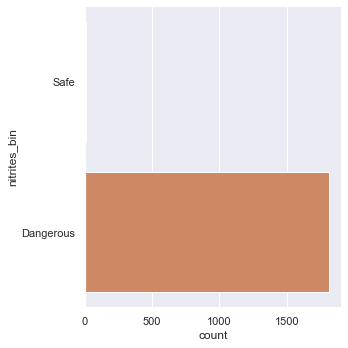

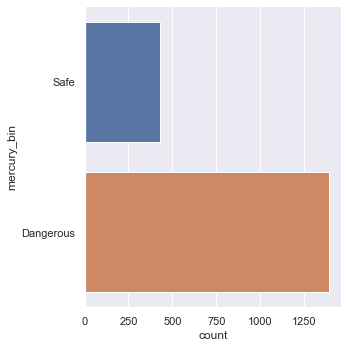

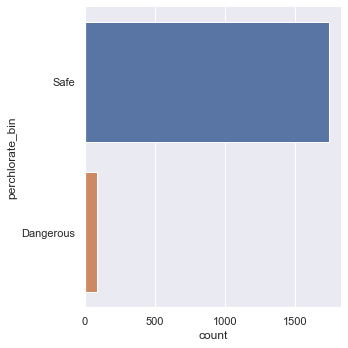

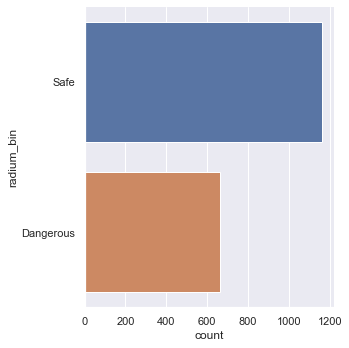

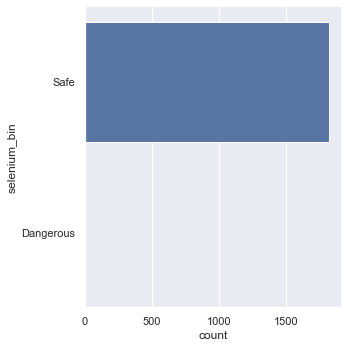

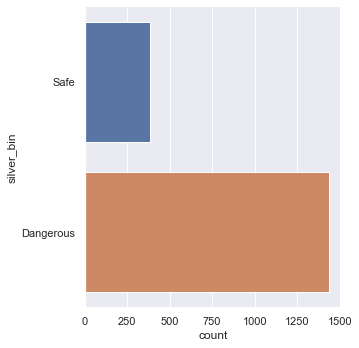

In [24]:
for y in OriginalDataForLDA.columns.values.tolist()[21:41]:
    sb.catplot(y = y, data = OriginalDataForLDA, kind = "count")

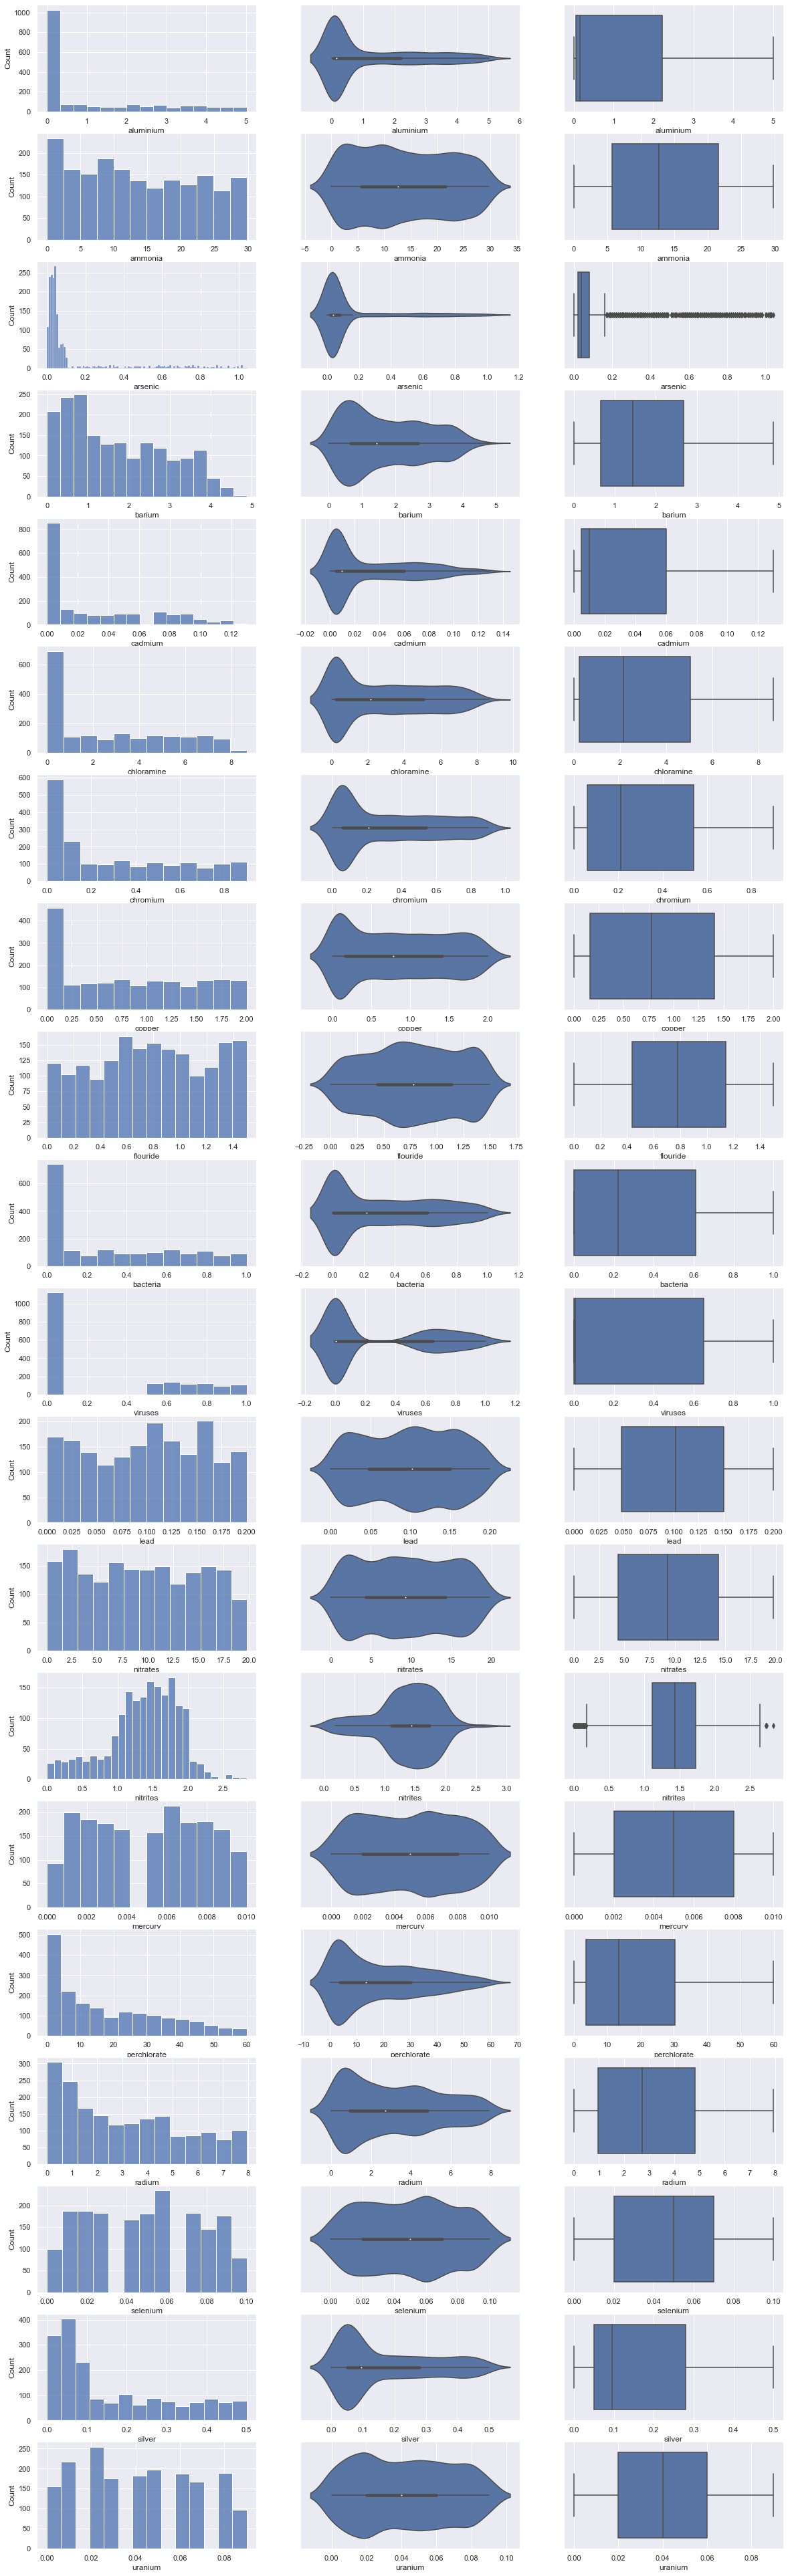

In [25]:
f, axes = plt.subplots(20, 3, figsize=(20, 70))
i=0
for y in OriginalDataForLDA.columns.values.tolist()[0:20]:
    
    sb.histplot(data = OriginalDataForLDA, x = y, ax=axes[i,0])
    sb.violinplot(data = OriginalDataForLDA,x=y, ax = axes[i,1])
    sb.boxplot(data = OriginalDataForLDA, x=y,orient = "h", ax = axes[i,2])
    i=i+1;

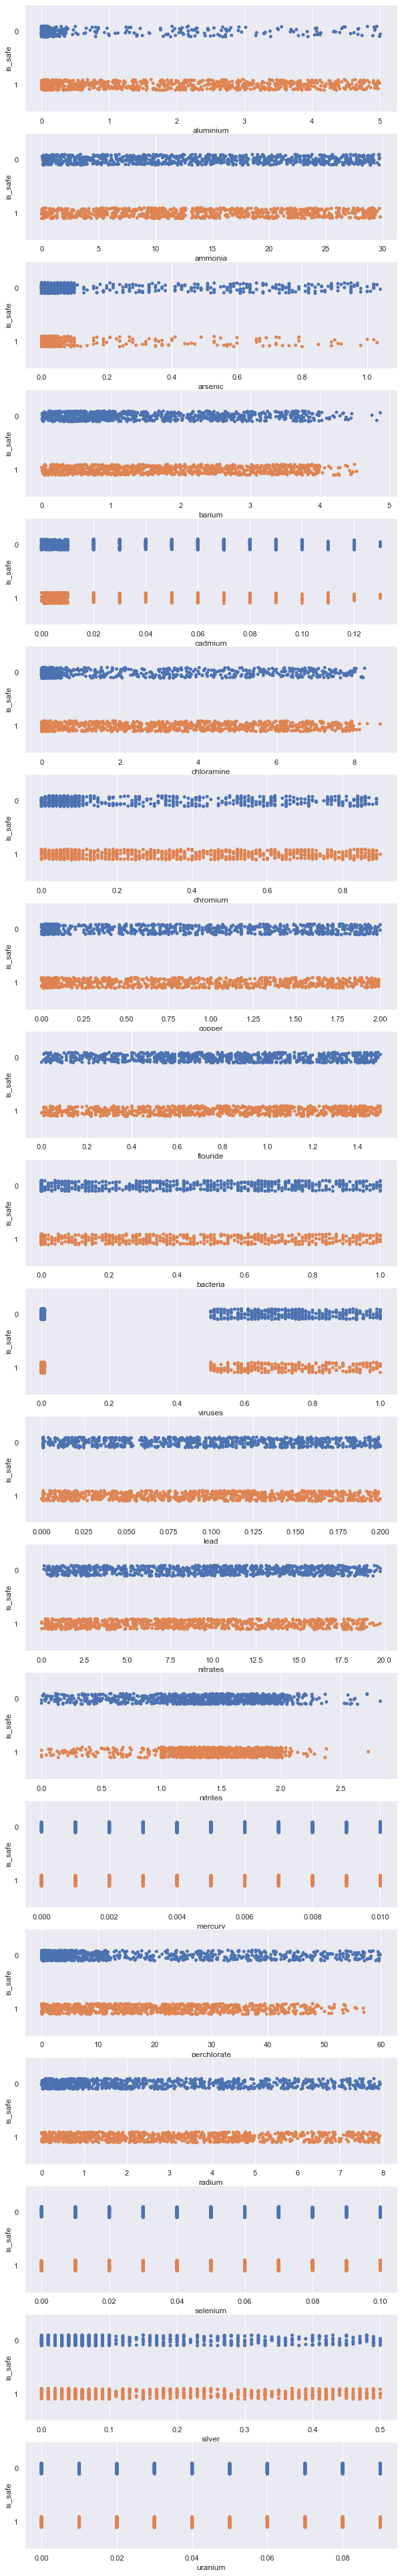

In [26]:
f, axes = plt.subplots(20, 1, figsize=(10, 70))
i=0
for j in OriginalDataForLDA.columns.values.tolist()[0:20]:
    sb.stripplot(x = j, y = 'is_safe', data = OriginalDataForLDA, ax=axes[i])
    i=i+1

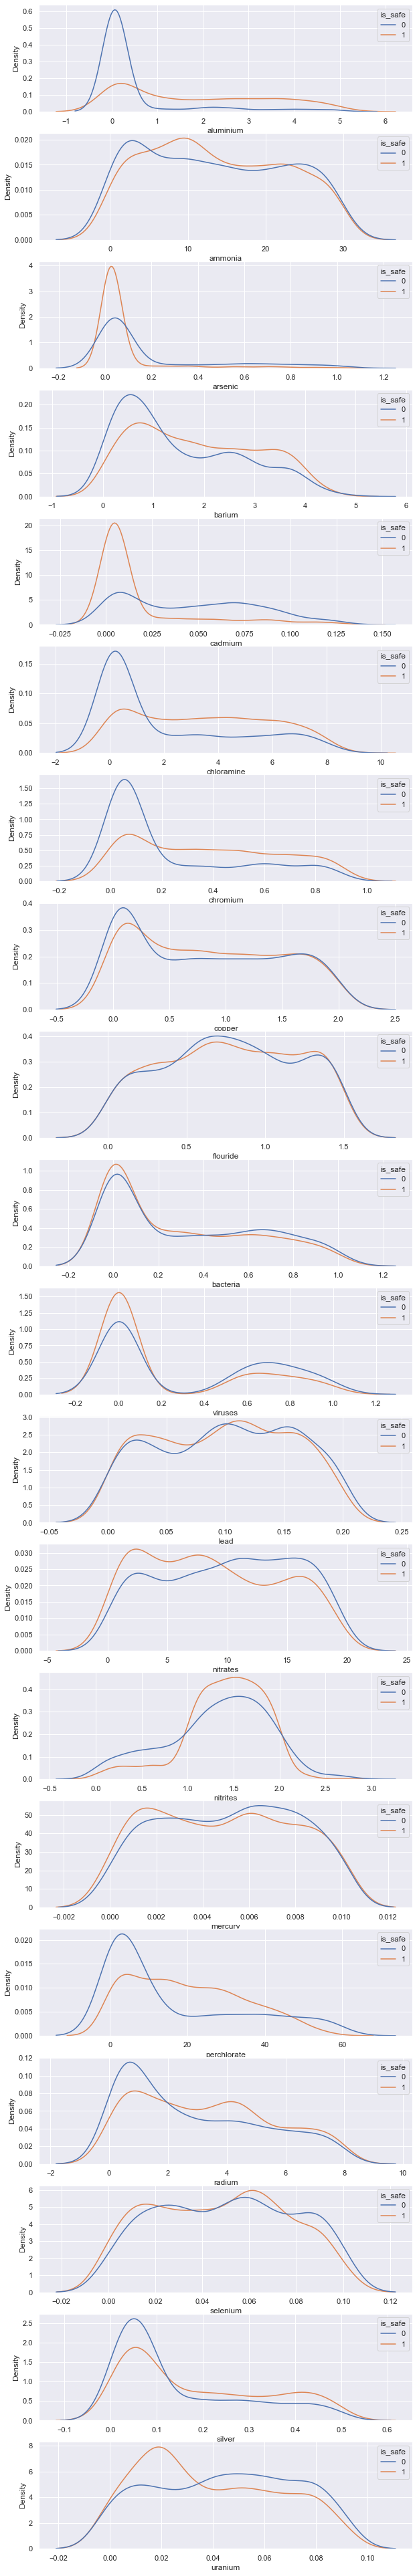

In [27]:
f, axes = plt.subplots(20, 1, figsize=(10, 70))
i=0
for j in OriginalDataForLDA.columns.values.tolist()[0:20]:
    sb.kdeplot(x = j, hue = 'is_safe', data = OriginalDataForLDA, ax=axes[i])
    i=i+1

### Neural Network

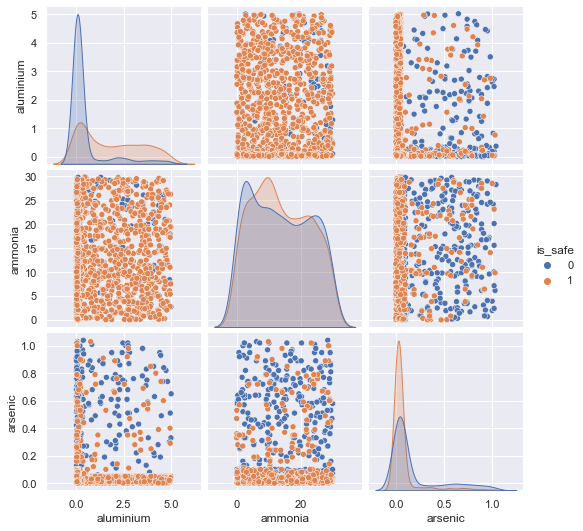

In [28]:
sb.pairplot(OriginalDataForLDA,vars = OriginalDataForLDA.iloc[:,0:3], hue="is_safe")

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
OriginalDataForLDA.iloc[:,0:19] = scaler.fit_transform(OriginalDataForLDA.iloc[:,0:19])

In [30]:
X = OriginalDataForLDA.iloc[:,0:20]
y = OriginalDataForLDA['is_safe']


In [31]:
y=y.astype(float, errors = 'raise')

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=5)


In [33]:
print(X_train.shape)
print(X_test.shape)
print(len(X_train.columns))

(1368, 20)
(456, 20)
20


In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1368 entries, 431 to 867
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    1368 non-null   float64
 1   ammonia      1368 non-null   float64
 2   arsenic      1368 non-null   float64
 3   barium       1368 non-null   float64
 4   cadmium      1368 non-null   float64
 5   chloramine   1368 non-null   float64
 6   chromium     1368 non-null   float64
 7   copper       1368 non-null   float64
 8   flouride     1368 non-null   float64
 9   bacteria     1368 non-null   float64
 10  viruses      1368 non-null   float64
 11  lead         1368 non-null   float64
 12  nitrates     1368 non-null   float64
 13  nitrites     1368 non-null   float64
 14  mercury      1368 non-null   float64
 15  perchlorate  1368 non-null   float64
 16  radium       1368 non-null   float64
 17  selenium     1368 non-null   float64
 18  silver       1368 non-null   float64
 19  urani

In [35]:
y_train

431     0.0
1180    1.0
1271    1.0
649     0.0
1333    1.0
       ... 
1142    1.0
998     1.0
1725    1.0
206     0.0
867     0.0
Name: is_safe, Length: 1368, dtype: float64

In [36]:
import tensorflow as tf
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

def base_model():
    model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(20,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
    ])

    def get_optimizer():
        return tf.keras.optimizers.Adam(learning_rate=0.01)


# opt = keras.optimizers.Adam(learning_rate=0.01)

    model.compile(optimizer=get_optimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    model.evaluate(X_test, y_test)

    return model


my_model = KerasRegressor(build_fn=base_model)    
history=my_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150)

C:\Users\Nabil\AppData\Local\Temp/ipykernel_32252/3247136125.py:29: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  my_model = KerasRegressor(build_fn=base_model)


15/15 [==============================] - 0s 570us/step - loss: 0.7083 - accuracy: 0.4364
Epoch 1/150
43/43 [==============================] - 0s 2ms/step - loss: 0.5853 - accuracy: 0.7061 - val_loss: 0.4764 - val_accuracy: 0.7961
Epoch 2/150
43/43 [==============================] - 0s 1ms/step - loss: 0.4792 - accuracy: 0.7741 - val_loss: 0.4386 - val_accuracy: 0.8092
Epoch 3/150
43/43 [==============================] - 0s 1ms/step - loss: 0.4330 - accuracy: 0.7997 - val_loss: 0.4019 - val_accuracy: 0.8202
Epoch 4/150
43/43 [==============================] - 0s 1ms/step - loss: 0.4095 - accuracy: 0.8070 - val_loss: 0.3737 - val_accuracy: 0.8289
Epoch 5/150
43/43 [==============================] - 0s 1ms/step - loss: 0.3905 - accuracy: 0.8151 - val_loss: 0.3386 - val_accuracy: 0.8553
Epoch 6/150
43/43 [==============================] - 0s 1ms/step - loss: 0.3422 - accuracy: 0.8501 - val_loss: 0.3404 - val_accuracy: 0.8443
Epoch 7/150
43/43 [==============================] - 0s 1ms/step 

43/43 [==============================] - 0s 1ms/step - loss: 0.1274 - accuracy: 0.9452 - val_loss: 0.2536 - val_accuracy: 0.8969
Epoch 59/150
43/43 [==============================] - 0s 1ms/step - loss: 0.1327 - accuracy: 0.9423 - val_loss: 0.2863 - val_accuracy: 0.8860
Epoch 60/150
43/43 [==============================] - 0s 1ms/step - loss: 0.1357 - accuracy: 0.9423 - val_loss: 0.2660 - val_accuracy: 0.8969
Epoch 61/150
43/43 [==============================] - 0s 1ms/step - loss: 0.1287 - accuracy: 0.9481 - val_loss: 0.2800 - val_accuracy: 0.9035
Epoch 62/150
43/43 [==============================] - 0s 1ms/step - loss: 0.1291 - accuracy: 0.9474 - val_loss: 0.2642 - val_accuracy: 0.8969
Epoch 63/150
43/43 [==============================] - 0s 1ms/step - loss: 0.1246 - accuracy: 0.9466 - val_loss: 0.2827 - val_accuracy: 0.8816
Epoch 64/150
43/43 [==============================] - 0s 1ms/step - loss: 0.1194 - accuracy: 0.9474 - val_loss: 0.2867 - val_accuracy: 0.8991
Epoch 65/150
43/43 

Epoch 116/150
43/43 [==============================] - 0s 1ms/step - loss: 0.0820 - accuracy: 0.9642 - val_loss: 0.3870 - val_accuracy: 0.8991
Epoch 117/150
43/43 [==============================] - 0s 1ms/step - loss: 0.0796 - accuracy: 0.9635 - val_loss: 0.3293 - val_accuracy: 0.9035
Epoch 118/150
43/43 [==============================] - 0s 1ms/step - loss: 0.0799 - accuracy: 0.9649 - val_loss: 0.3430 - val_accuracy: 0.9057
Epoch 119/150
43/43 [==============================] - 0s 1ms/step - loss: 0.0813 - accuracy: 0.9664 - val_loss: 0.3968 - val_accuracy: 0.9035
Epoch 120/150
43/43 [==============================] - 0s 1ms/step - loss: 0.1139 - accuracy: 0.9532 - val_loss: 0.3433 - val_accuracy: 0.9013
Epoch 121/150
43/43 [==============================] - 0s 1ms/step - loss: 0.0823 - accuracy: 0.9627 - val_loss: 0.4122 - val_accuracy: 0.9057
Epoch 122/150
43/43 [==============================] - 0s 1ms/step - loss: 0.0872 - accuracy: 0.9678 - val_loss: 0.3971 - val_accuracy: 0.8947

In [37]:
perm = PermutationImportance(my_model, random_state=1).fit(X[:500].values,y[:500].values,verbose=False)
eli5.show_weights(perm, feature_names = X.columns.tolist())


16/16 [==============================] - 0s 864us/step - loss: 0.3290 - accuracy: 0.9200


16/16 [==============================] - 0s 864us/step - loss: 0.2814 - accuracy: 0.9300


Weight,Feature
1.5649 ± 0.5148,aluminium
1.1984 ± 0.1208,perchlorate
0.6864 ± 0.0906,silver
0.6761 ± 0.1449,chloramine
0.5772 ± 0.1348,arsenic
0.3386 ± 0.0903,chromium
0.1915 ± 0.0693,ammonia
0.1518 ± 0.0354,nitrates
0.1460 ± 0.1174,cadmium
0.1456 ± 0.0763,bacteria


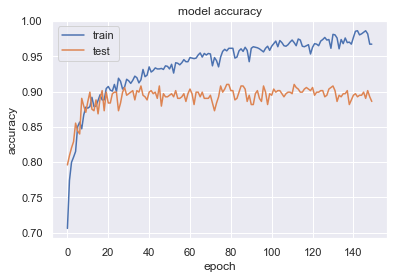

In [38]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

In [39]:
model2 = keras.Sequential([
    keras.layers.Dense(20, input_shape=(20,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

def get_optimizer():
    return tf.keras.optimizers.Adam(learning_rate=0.01)


# opt = keras.optimizers.Adam(learning_rate=0.01)

model2.compile(optimizer=get_optimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history=model2.fit(X_train, y_train, epochs=100,validation_data=(X_test, y_test))
model2.evaluate(X_test, y_test)

Epoch 1/100
43/43 [==============================] - 1s 6ms/step - loss: 0.5804 - accuracy: 0.7018 - val_loss: 0.4927 - val_accuracy: 0.7763
Epoch 2/100
43/43 [==============================] - 0s 1ms/step - loss: 0.4774 - accuracy: 0.7690 - val_loss: 0.4298 - val_accuracy: 0.8136
Epoch 3/100
43/43 [==============================] - 0s 1ms/step - loss: 0.4260 - accuracy: 0.7975 - val_loss: 0.4005 - val_accuracy: 0.8180
Epoch 4/100
43/43 [==============================] - 0s 1ms/step - loss: 0.3955 - accuracy: 0.8121 - val_loss: 0.3776 - val_accuracy: 0.8224
Epoch 5/100
43/43 [==============================] - 0s 1ms/step - loss: 0.3859 - accuracy: 0.8173 - val_loss: 0.3575 - val_accuracy: 0.8399
Epoch 6/100
43/43 [==============================] - 0s 1ms/step - loss: 0.3637 - accuracy: 0.8341 - val_loss: 0.3390 - val_accuracy: 0.8465
Epoch 7/100
43/43 [==============================] - 0s 1ms/step - loss: 0.3447 - accuracy: 0.8370 - val_loss: 0.3220 - val_accuracy: 0.8575
Epoch 8/100
4

Epoch 59/100
43/43 [==============================] - 0s 1ms/step - loss: 0.1209 - accuracy: 0.9532 - val_loss: 0.3180 - val_accuracy: 0.8991
Epoch 60/100
43/43 [==============================] - 0s 1ms/step - loss: 0.1260 - accuracy: 0.9481 - val_loss: 0.2665 - val_accuracy: 0.8991
Epoch 61/100
43/43 [==============================] - 0s 1ms/step - loss: 0.1112 - accuracy: 0.9576 - val_loss: 0.2674 - val_accuracy: 0.9079
Epoch 62/100
43/43 [==============================] - 0s 1ms/step - loss: 0.1060 - accuracy: 0.9591 - val_loss: 0.2739 - val_accuracy: 0.9189
Epoch 63/100
43/43 [==============================] - 0s 1ms/step - loss: 0.1024 - accuracy: 0.9605 - val_loss: 0.2837 - val_accuracy: 0.9145
Epoch 64/100
43/43 [==============================] - 0s 1ms/step - loss: 0.1032 - accuracy: 0.9554 - val_loss: 0.3083 - val_accuracy: 0.8882
Epoch 65/100
43/43 [==============================] - 0s 1ms/step - loss: 0.1110 - accuracy: 0.9583 - val_loss: 0.2630 - val_accuracy: 0.9013
Epoch 

[0.45191890001296997, 0.8881579041481018]

In [40]:
yp = model2.predict(X_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89       228
         1.0       0.92      0.85      0.88       228

    accuracy                           0.89       456
   macro avg       0.89      0.89      0.89       456
weighted avg       0.89      0.89      0.89       456

[[211  17]
 [ 34 194]]


Text(66.5, 0.5, 'Truth')

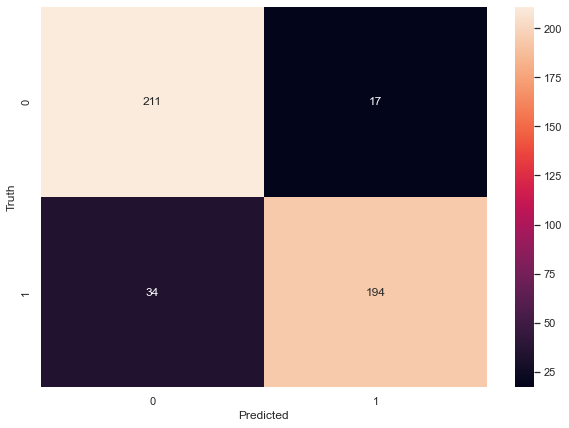

In [41]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### linear regression

Feature: 0, Score: 0.64604
Feature: 1, Score: -0.01055
Feature: 2, Score: -0.39372
Feature: 3, Score: -0.02121
Feature: 4, Score: -0.38785
Feature: 5, Score: 0.31136
Feature: 6, Score: 0.25993
Feature: 7, Score: -0.18064
Feature: 8, Score: -0.02000
Feature: 9, Score: -0.08025
Feature: 10, Score: -0.11768
Feature: 11, Score: -0.17480
Feature: 12, Score: -0.09019
Feature: 13, Score: -0.02465
Feature: 14, Score: -0.07486
Feature: 15, Score: -0.08253
Feature: 16, Score: -0.03717
Feature: 17, Score: -0.04735
Feature: 18, Score: -0.18847
Feature: 19, Score: -2.24445


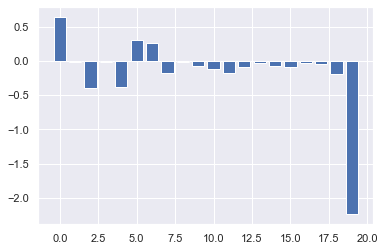

In [42]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# define the model
model = LinearRegression()
# fit the model
model.fit(X_test, y_test)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Logistical Regression

Feature: 0, Score: 3.33924
Feature: 1, Score: -0.06935
Feature: 2, Score: -1.70217
Feature: 3, Score: -0.15924
Feature: 4, Score: -2.05981
Feature: 5, Score: 1.66101
Feature: 6, Score: 1.39999
Feature: 7, Score: -0.99261
Feature: 8, Score: -0.13177
Feature: 9, Score: -0.45018
Feature: 10, Score: -0.77562
Feature: 11, Score: -0.88795
Feature: 12, Score: -0.53469
Feature: 13, Score: -0.05125
Feature: 14, Score: -0.38461
Feature: 15, Score: -0.50215
Feature: 16, Score: -0.24198
Feature: 17, Score: -0.15489
Feature: 18, Score: -0.95183
Feature: 19, Score: -0.62116


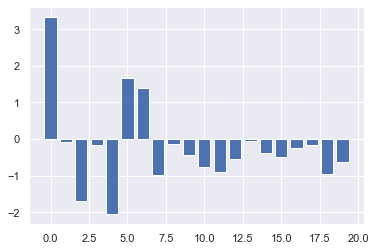

In [43]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# define the model
model = LogisticRegression()
# fit the model
model.fit(X_test, y_test)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Random Forrest

Feature: 0, Score: 0.18436
Feature: 1, Score: 0.02427
Feature: 2, Score: 0.05912
Feature: 3, Score: 0.02567
Feature: 4, Score: 0.16369
Feature: 5, Score: 0.06990
Feature: 6, Score: 0.03960
Feature: 7, Score: 0.02512
Feature: 8, Score: 0.01857
Feature: 9, Score: 0.02727
Feature: 10, Score: 0.04535
Feature: 11, Score: 0.02726
Feature: 12, Score: 0.03754
Feature: 13, Score: 0.04141
Feature: 14, Score: 0.01070
Feature: 15, Score: 0.06033
Feature: 16, Score: 0.02938
Feature: 17, Score: 0.01371
Feature: 18, Score: 0.05905
Feature: 19, Score: 0.03771


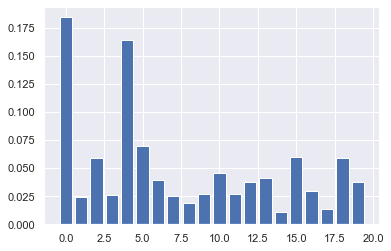

In [44]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()